<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Laboratorio - Árboles de decisión, reglas y ensemble learning</h1></center>

<b>Juan David Escobar Escobar.</b></br>
Diciembre 2021.

#borarrrrr ojoooooooooooooooooooooooooooooooo

https://rstudio-pubs-static.s3.amazonaws.com/118220_5a7997d6b0aa493c878d661968fc1f08.html.
https://www.kaggle.com/retroflake/classification-of-car-s-acceptability.
https://www.youtube.com/watch?v=0V4Eygf6rus.
https://medium.com/data-science-practices/classification-of-car-evaluation-data-set-by-decision-tree-algorithm-rstudio-3a1c2fbe02c6.
https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial.
https://www.youtube.com/watch?v=TJJOz6thSfk&list=PLJjOveEiVE4Dk48EI7I-67PEleEC5nxc3&index=37.
https://vitalflux.com/random-forest-classifier-python-code-example/
https://learn.acloud.guru/search?query=Creating%20a%20scikit-learn%20Random%20Forest%20Classifier%20in%20AWS%20SageMaker&page=1
https://www.kaggle.com/prashant111/random-forest-classifier-tutorial

## EDA - Exploración de datos</h2>

### importar librerias e inicializar variables globales

Como uso una laptop Mac, deben añadirse las dos líneas siguientes para importar correctamente ficheros de forma segura.

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import pandas as pd

from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

import seaborn as sns
from seaborn import lmplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn import tree

import plotly.graph_objs as go
import plotly.offline as py

import pydotplus

import numpy

from scipy import stats

from mlxtend.plotting import plot_decision_regions

import os

### Cargar dataset en memoria

In [ ]:
nombre_data_set = "Laboratorio_dataset_car.csv"
encoding = 'utf8'

In [ ]:
dataset = read_csv(nombre_data_set, sep=';', encoding=encoding, header='infer')

### Fase exploratoria de los datos

In [ ]:
# -------------------------------------------------------------------
# Visualizamos los primeros 5 registros del dataset para asimilar los 
# datos contenidos en cada variable del dataset.
# -------------------------------------------------------------------

dataset.head(5)

In [ ]:
# -------------------------------------------------------------------
# Como resultado la propiedad shape del dataset nos retorna una tupla
# indicandonos el número de filas y de columnas o en terminos de la
# materia/tema, numero de instancias, atributos y clases.
# -------------------------------------------------------------------

print(dataset.shape)

In [ ]:
# -------------------------------------------------------------------
# Cantidad de valores por cada clase.
# -------------------------------------------------------------------

print(dataset.groupby('class').size())

In [ ]:
# -------------------------------------------------------------------
# Obtendremos una descripción básica de los datos almacenados en cada
# variable, podemos analizar caracteristicas tales como:
#   -Cantidad de registros o instancias.
#   -Cantidad de valores unicos. 
#   -El top o valor mas repetido. 
#   -La frecuencia o número de veces que se  repite el valor.
#
# En el resultado obtenido tambien evidenciamos que no hay valores 
# nulos (dataset.isnull().sum()).
# -------------------------------------------------------------------


print(dataset.describe(), '\n', '-'*60)
print(dataset.isnull().sum())

In [ ]:
# -------------------------------------------------------------------
# Esta instrucción nos brinda un poco mas de información para cada 
# una de las variables del dataset, en este caso podemos observar 
# el tipo de dato asociado al esquema y tipos de datos inferidos por el 
# metodo de la libreria pandas read_csv.
# -------------------------------------------------------------------

print(dataset.info())

A continuación se valida la distribución y los valores atipicos de cada variable, para porteriormente validar el factor común de los tipos de datos y asi ajustar los tipos de datos (cualitativos y cuantitativos) en caso de que sea necesario. 

In [ ]:
print(dataset.nunique())

In [ ]:
def obtener_conteo_valores_unicos_col(dataset):
    """
    Esta función Validar el tipo de dato que mas se 
    ajusta a cada variable según los valores 
    almacenados.
    Parameters
    ----------
    dataset : pandas.dataframe
    Corresponde al dataset cargado en memoria a partir
    de la lectura del CSV.
    
    Return
    ------
    
    Precondition
    ------------
    
    Example
    -------
    >>> obtener_conteo_valores_unicos_col(dataset)
    print(group by count() for each col)
    """
    
    lista_cols = list(dataset.columns.values)
    
    for val in lista_cols:
        print(dataset.groupby(val).size())
        print('-'*12)         
           
obtener_conteo_valores_unicos_col(dataset)

A continuaón se muestra una tabla con el resumen del valor de la frecuencia de cada valor almacenado en cada variable
y si son de tipo (cualitativo o cualtitativo), catalogamos la variables de la siguiente manera:

Evaluación de aceptabilidad del cliente en automóviles que utilizan clasificación


<ul>
    <li>Cuntitativos:
        <ul>
            <li>Discretos (el número de hijos por mujer).</li>
            <li>Continuos (la longitud del pétalo de una flor).</li>
        </ul>
    </li>
    <li>Cualitativos:
        <ul>
            <li>Categóricos / Nominales (perro, gato, loro).</li>
            <li>Ordinales (suspenso, aprobado, notable, sobresaliente).</li>
        </ul>
    </li>
</ul>
</br>
<ul>
    <li>Buying:
        <ul>
            <li>Tipo de variable cualitativa (ordinal).</li>
            <li>Tipo de dato (Texto/String).</li>
            <li>Descripcíón: Precio de compra</li>			
        </ul>
    </li>
   <li>Maintenance:
        <ul>
            <li>Tipo de variable cualitativa (ordinal).</li>
            <li>Tipo de dato (Texto/String).</li>
            <li>Descripcíón: Precio de mantenimiento</li>			
        </ul>
    </li>
    <li>Maintenance:
        <ul>
            <li>Tipo de variable cualitativa (ordinal).</li>
            <li>Tipo de dato (Texto/String).</li>
            <li>Descripcíón: Precio de mantenimiento</li>			
        </ul>
    </li>
    <li>Doors:
        <ul>
            <li>Tipo de variable cuantitativa (discreta).</li>
            <li>Tipo de dato (Numerica/Integer).</li>
            <li>Descripcíón: Precio de puertas</li>			
        </ul>
    </li>
    <li>Person:
        <ul>
            <li>Tipo de variable cuantitativa (discreta). .</li>
            <li>Tipo de dato (Texto/String).</li>
            <li>Descripcíón: apacidad de personas para llevar</li>			
        </ul>
    </li>
    <li>Lug_boot:
        <ul>
            <li>Tipo de variable cualitativa (ordinal).</li>
            <li>Tipo de dato (Texto/String).</li>
            <li>Descripcíón: Talla o capacidad de maletero.</li>			
        </ul>
    </li>
    <li> Safety:
        <ul>
            <li>Tipo de variable cualitativa (ordinal).</li>
            <li>Tipo de dato (Texto/String).</li>
            <li>Descripcíón: Seguridad estimada.</li>			
        </ul>
    </li>
    <li> Class:
        <ul>
            <li>Tipo de variable cualitativa (ordinal).</li>
            <li>Tipo de dato (Texto/String).</li>
            <li>Descripcíón: Aceptabilidad del automovil.</li>			
        </ul>
    </li>
</ul>   

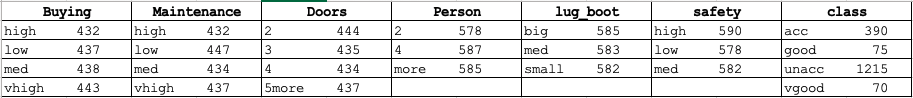

In [ ]:
# -------------------------------------------------------------------
# Remplazamos los valores atipicos para las variables Doors y Persons
# de esta manera podermos ajustarlas a tipo entero (cualitativas).
# Tambien aprovechamos para mapear las variables categoricas en
# datos númericos y asi poder optimizar el modelo y aumentar la
# capacidad de predicción.
# -------------------------------------------------------------------

dataset.Doors.replace(('5more'),(5),inplace=True)
dataset.Person.replace(('more'),(5),inplace=True)
dataset.Buying.replace(('vhigh', 'high', 'med', 'low'), (3, 2, 1, 0), inplace = True)
dataset.Maintenance.replace(('vhigh', 'high', 'med', 'low'), (3, 2, 1, 0), inplace = True)
dataset.lug_boot.replace(('small','med','big'),(0,1,2),inplace=True)
dataset.safety.replace(('low','med','high'),(0,1,2),inplace=True)

In [ ]:
# -------------------------------------------------------------------
# Validamos la existencia de registros duplicados para eliminar 
# registros redundates, para nuestro caso no se encontro ninguno.
# -------------------------------------------------------------------

dataset.drop_duplicates()
print(dataset.shape)

### Fase de ajuste de esquema y tipos de datos

In [ ]:
dataset['Buying'] = dataset['Buying'].astype(str).astype(int)
dataset['Maintenance'] = dataset['Maintenance'].astype(str).astype(int)
dataset['lug_boot'] = dataset['lug_boot'].astype(str).astype(int)
dataset['safety'] = dataset['safety'].astype(str).astype(int)
#dataset['class'] = dataset['class'].astype(str)
dataset['Doors'] = dataset['Doors'].astype(str).astype(int)
dataset['Person'] = dataset['Person'].astype(str).astype(int)

dataset.loc[:, dataset.dtypes == 'object'] = dataset.select_dtypes(['object']).apply(lambda x: x.astype('category'))
dataset.dtypes                                                 

### Analisis distribución de los datos

In [ ]:
# Lista variables cualitativas (Categóricos/Ordinales)
category_columns = list(dataset.select_dtypes(include=['category']).columns)

# Lista variables cuantitativas (Discretos/Continuos)
integer_columns = list(dataset.select_dtypes(include=['int64']).columns)

print(category_columns)
print(integer_columns)

Estadisticos y distribución de las variables cuantitativas

In [ ]:
def imprimir_estadisticas(col_numericas, df):
    
    for col in col_numericas:
        
        col_act = df[col].tolist()
        
        print('{0} \n -media:{1} \n -mediana:{2} \n -moda:{3} \n -desviacion:{4} \n -var:{5} \n -percentil:{6}'.format(col,                                                                                                 
                      str(numpy.mean(col_act)),
                      str(numpy.median(col_act)),
                      str(stats.mode(col_act)),
                      str(numpy.std(col_act)),
                      str(numpy.var(col_act)),
                      str(numpy.percentile(col_act, 75))), '\n')
                      
imprimir_estadisticas(integer_columns, dataset)        

In [ ]:
def graficar_histograma_cuantitativas(col_numericas, df):
    
    for col in col_numericas:
        
        print('Title. Distribución de datos en', col)
        data_person = list(df[col])
        plt.hist(data_person, 5)
        plt.show()
        
graficar_histograma_cuantitativas(integer_columns, dataset)

In [ ]:
dataset.plot(kind='box',subplots=True, layout=(2,3), sharex=False, sharey=False)
pyplot.show()

Estadisticos y distribución de las variables cualitativas

In [ ]:
def graficar_histograma_cualitativas(col_cualitativas, df):
    
    for col in col_cualitativas:
        
        print('Title. Distribución de datos en', col)
        ax = sns.countplot(x=df[col],
                   order=df[col].value_counts(ascending=False).index)
        abs_values = df[col].value_counts(ascending=False).values
        ax.bar_label(container=ax.containers[0], labels=abs_values)
        
graficar_histograma_cualitativas(category_columns, dataset)

▸Número de clases, indicando que representan dichas clases y el tipo de valor que toman:
 
 Tipos de valor cualitativo/categorico: De acuerdo a los a tributos de la instancia, indican
 los cuales indican la aceptabiliad o evealuación de un auto.

 1. Acceptable(acc)
 2. Good(good)
 3. Unacceptable(unacc)
 4. Very Good(vgood)
 
▸Número de instancias en total: 1750

▸Número de instancias pertenecientes a cada clase:

 -Acceptable(acc): 390
 -Good(good): 75
 -Unacceptable(unacc): 1275
 -Very Good(vgood): 70

▸Número de atributos de entrada, su significado y tipo:

 -Buying - Precio de compra (alto, alto, medio, bajo)
 -Maintenance - Precio del mantenimiento (alto, alto, medio, bajo)
 -Doors - Número de puertas (2, 3, 4, 5 más)
 -Person - Capacidad de pasajeros (2, 4, más)
 -lug_boot - Tamaño del maletero (pequeño, mediano, grande)
 -safety - Seguridad del automóvil (baja, media, alta)

▸¿Hay algún valor de atributo desconocido? 
 -Si aquellos valores que tienen clasificación igual a  "5more" y "more"
  los cuales se asumen como el valor 5.

### Comparacón clase y atributos

In [ ]:
features = dataset.iloc[:,:-1]
features[:5]
list_class =[]
for i in features:
    list_class.append(features[i].value_counts())   

In [ ]:
buy = pd.crosstab(dataset['Buying'], dataset['class'])
mc = pd.crosstab(dataset['Maintenance'], dataset['class'])
drs = pd.crosstab(dataset['Doors'], dataset['class'])
prsn = pd.crosstab(dataset['Person'], dataset['class'])
lb = pd.crosstab(dataset['lug_boot'], dataset['class'])
sfty = pd.crosstab(dataset['safety'], dataset['class'])

list_attr = [{'Buying': buy, 'title' : 'Precio de venta vs Clasificación'},
             {'Maintenance': mc, 'title' : 'Precio de mantenimiento vs Clasificación'},
             {'Doors': mc, 'title' : 'Número de puertas vs Clasificación'},
             {'Person': prsn, 'title' : 'Capacidad de pasajeros vs Clasificación'},
             {'lug_boot': lb, 'title' : 'Tamaño del maletero vs Clasificación'},
             {'safety': sfty,'title' : 'Seguridad del automóvil vs Clasificación'}]


list_attr[0]['Buying']

In [ ]:
def graficar_rel_attrs_clase(list_attr, integer_columns):
        
    for idx, col in enumerate(integer_columns):
        attr_count = list_attr[idx][col]
        title = list_attr[idx]['title']

        data = [
            go.Bar(
                x = list_class[2].index, 
                y = attr_count['unacc'],
                name = 'Unacceptable'
            ),
            go.Bar(
                x = list_class[2].index,
                y = attr_count['acc'],
                name = 'Acceptable'
            ),
            go.Bar(
                x = list_class[2].index,
                y = attr_count['good'],
                name = 'Good'
            ),
            go.Bar(
                x = list_class[2].index,
                y = attr_count['vgood'],
                name = 'Very Good'
            )
        ]

        layout = go.Layout(
            barmode = 'stack',
            title = title
        )

        fig = go.Figure(data = data, layout = layout)
        py.iplot(fig, filename='cars_donut')


graficar_rel_attrs_clase(list_attr, integer_columns)    

##  Arbol de desición - CART indice GINI (Supervisado - Claificasión)

Notas importantes:

<p>
-Mientras usamos la ganancia de información como criterio, asumimos que los atributos son categóricos
y para el índice de Gini, se supone que los atributos son continuos. 
</p>  
    
<p>
-Otra medida de selección de atributos que utiliza CART (árboles categóricos y de regresión) es
    el <b>índice de Gini</b>. Utiliza el método Gini para crear puntos de división.
El índice de Gini se puede representar con el siguiente diagrama:
</p>   
</br>
<div style="position:relative;width:950px;height:100px;" align="left">
    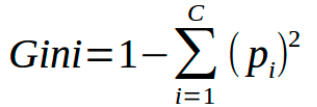
</div>

<spam>Aquí, nuevamente c es el número de clases y pi es la probabilidad asociada con la i-ésima clase.</spam>


### Split 80% - 20% (Entrenamiento y Pruebas)

Se usaran 80% de los datos para entrenar los algoritmos y un 20% de los datos para hacer
pruebas de predicción (Esta suele ser una proporción habitual).

In [ ]:
dataset.sample(5)

In [ ]:
array = dataset.values

X = array[:,0:6]
y = array[:,6]

X_train,\
X_validation,\
Y_train,\
Y_validation = train_test_split(X,
                                y, 
                                test_size = 0.20, 
                                random_state = 1, 
                                shuffle = True) # Aleatorio

print(len(array)) # 1750
print(len(X)) # 1750
print(len(y)) # 1750
print(len(X_train)) # 1400
print(len(X_validation)) # 350
print(len(Y_train)) # 1400
print(len(Y_validation)) # 350

In [ ]:
print(X)

In [ ]:
print(y)

In [ ]:
print(X_train.shape, X_validation.shape)

In [ ]:
print(Y_train)

### Crear Modelo

In [ ]:
# Espectativa: X_train
# Objetivo: Y_train     

model = DecisionTreeClassifier(criterion='gini',
                               #max_depth=3, 
                               random_state=0)
model.fit(X_train, Y_train)

### Visualizar Modelo

In [ ]:
plt.figure(figsize = (15, 10))
plot_tree(decision_tree = model, 
          feature_names = integer_columns, 
          filled = True, 
          class_names = ['acc', 'good', 'unacc', 'vgood'],
          fontsize = 11,
          node_ids = True,
          max_depth = 3 
         );

### Calcular Predicción

Predicción seguridad de un automovil con el indice GINI, utilizando en conjunto de pruba X_validation

In [ ]:
y_pred_gini = model.predict(X_validation)

### Evaluar efectividad y rendimiento del modelo

<b>Matriz de confusión:</b> 

<p>Esta herramienta nos muestra un resumen del rendimiento del algoritmo de
clasificación, tambien podemos visualizar algunos errores. Por ultimo
muestra un resumen tabular con las predicciones correctas e incorrectas de cada categoría:

-Verdaderos positivos (TP): los verdaderos positivos ocurren cuando predecimos que una observación pertenece a una determinada clase y la observación realmente pertenece a esa clase.
    
-Verdaderos negativos (TN): los verdaderos negativos ocurren cuando predecimos que una observación no pertenece a una determinada clase y la observación en realidad no pertenece a esa clase.

-Falsos positivos (FP): los falsos positivos ocurren cuando predecimos que una observación pertenece a una determinada clase, pero la observación en realidad no pertenece a esa clase. Este tipo de error se denomina error de tipo I.

-Falsos negativos (FN): los falsos negativos ocurren cuando predecimos que una observación no pertenece a una determinada clase, pero la observación en realidad pertenece a esa clase. Este es un error muy grave y se denomina error de Tipo II.  
</p>
<b>NOTA:</b> 
<ol>   
    <li>Escenario ideal: 0 falsos positivos y 0 falsos negativos, tambien que la diagonal de la 
    matriz tenga valores maximos y el resto ceros.</li>
    <li>En la diagonal principal se encuentran las evaluaciones correctas (TP).</li>
    <li>TG, son el resto de valores de la clase diferentes al de la intersección en la diagonal.</li>
    <li>FP, Para identificarlos nos ubicamos en el eje x de las predicciones, seleccionamos la clase
       a evaluar y observamos todos los valores ubicados en el eje y diferentes al de la diagonal.</li>
    <li>FN, se efectua la misma operación del punto 4 pero cambiando los ejes.</li>
    <li>la suma de elementos de cada fila, es el total de elementos asociados al conjunto de datos
       de prueba de cada clase.</li>
    <li>4 clases = matris 4 x 4.</li>
</ol>  


<div style="position:relative;width:950px;height:170px;" align="left">
    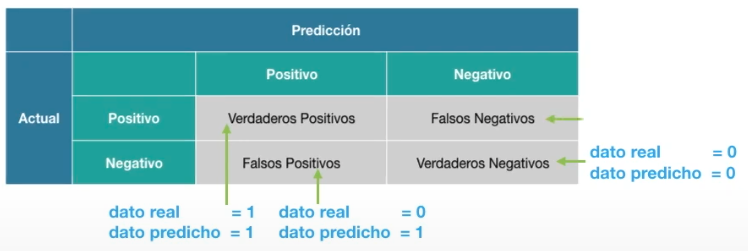
    <spam align="left">Imagen tomada de <a href="https://www.youtube.com/watch?v=r5WIImKV1XA&list=PLJjOveEiVE4Dk48EI7I-67PEleEC5nxc3&index=33">Canal YouTube 
(AprendeIA con Ligdi Gonzalez)
 </a></spam>
</div>

In [ ]:
print(confusion_matrix(Y_validation, 
                       y_pred_gini,
                       labels = ['acc', 'good', 'unacc', 'vgood']))

# clase =  ['acc', 'good', 'unacc', 'vgood']
# clasificacion = [tn, fp, fn, tp]
# Parametros valores reales de prueba y valores predecidos

In [ ]:
matrix = plot_confusion_matrix(model, X_validation, Y_validation, cmap=plt.cm.Reds)
matrix.ax_.set_title('Matriz de confusión')
plt.gcf().set_size_inches(10, 6)
plt.show()

### Medidas de precisión

<div style="position:relative;width:950px;height:170px;" align="left">
    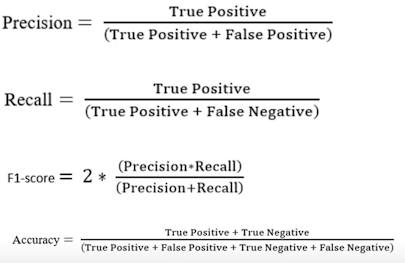
</div>

Se obtinene un reporte con las metricas de rendimiento del modelo, los resultados
muestran una presición y recall muy ceranos al maximo valor de 1 por lo cual tenemos
un modelo confiable y clasifica bien.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
print(metrics.classification_report(Y_validation, y_pred_gini, digits = 4))

Validación de la exactitud del modelo con el indice GINI, nos indica la exactitud de la clasificación 
entre las predicciónes correctas y el numero total de predicciones.

exactitud = VP + VN / (VP + FP + FN + VN)

In [ ]:
print(accuracy_score(Y_validation, y_pred_gini))

Validación de la precisión: relación entre las predicciones correctas y el número total de predicciones
correctas previstas (Mide la precision del algoritmo a la hora de predecir casos positivos).

presició = VP / (VP + FP)

Nota: Se calcula por cada clase

In [ ]:
print(precision_score(Y_validation, y_pred_gini, average='micro'))

Sensibilidad (Recall): relación entre predicciones positivas y el número total de predicciones positivas
              Tasa verdadera positiva.
              
sensibilidad = VP / (VP + FN)             
              
Nota: Se calcula por cada clase, el mejor valor es 1 y el peor valor es 0.           

In [ ]:
recall_score(Y_validation, y_pred_gini, average='micro')

Puntaje F1. Representa la sensibilidad y la presición

F1 = (2 * precision * sensibilidad) / (precision+sensibilidad)

In [ ]:
print(f1_score(Y_validation, y_pred_gini, average='micro'))

In [ ]:
print('Puntaje conjunto de entrenamiento: {:.4f}'.format(model.score(X_train, Y_train)))
print('Puntaje conjunto de validación: {:.4f}'.format(model.score(X_validation, Y_validation)))

# Son valores muy cercanos, por lo cual no hay signo de un sobreajuste del modelo

Curva de ROC (AUC - Area bajo la curva)

Nos dice que tan bueno puede distinguir el modelo entre 2 clases (si/no). Es ideal
que ambas curvas no se sobrepongan una a la otra (AUC = 0).

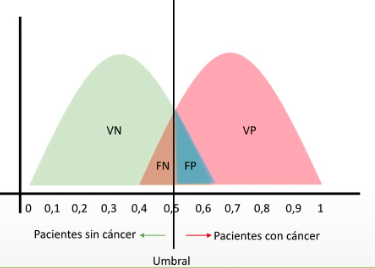

In [ ]:
import random

rd_sample = random.choice(X_validation)
print(rd_sample)

<b>Mapeo categorias:</b>

<ol>
<li>Buying: ('vhigh', 'high', 'med', 'low'), (3, 2, 1, 0)</li>
<li>Maintenance: ('vhigh', 'high', 'med', 'low'), (3, 2, 1, 0)</li>
<li>Doors: 1,2,3,4,5</li>
<li>Person: 1,2,3,4,5</li>
<li>lug_boot: ('small','med','big'),(0,1,2)</li>
<li>safety: ('low','med','high'),(0,1,2)</li>
<li>class: Acceptable(acc),Good(good),Unacceptable(unacc),Very Good(vgood)</li>
</ol>
    
<div style="position:relative;
	left:0;
	height:120px;   
    ">
    
<b>Ejemplo: [3 0 4 4 1 0] = </b>
<br/>       
<table class="default" align="left">
  <tr>
    <td>Buying</td>
    <td>Maintenance</td>
    <td>Doors</td>
    <td>Person</td>
    <td>lug_boot</td>
    <td>safety</td>
  </tr>
  <tr>
    <td>vhigh</td>
    <td>low</td>
    <td>4</td>
    <td>4</td>
    <td>med</td>
    <td>low</td>
  </tr>
  <tr>
    <td>3</td>
    <td>0</td>
    <td>4</td>
    <td>4</td>
    <td>1</td>
    <td>0</td>
  </tr>
</table>
 </div>


<div style="position:relative;width:950px;height:170px;" align="left">
    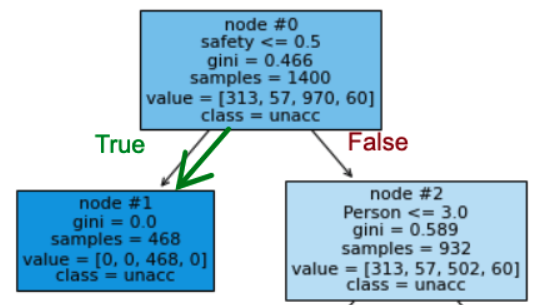
</div>
 <ol aling="left">
    <li>Acceptable(acc): 390</li>
    <li>Good(good): 75</li>
    <li>Unacceptable(unacc): 1275</li>
    <li>Very Good(vgood): 70</li>
</ol>
</br> 
<b>Hoja/Clase:</b>  unacc
</br> 

<p>
De las 1400 instancias seleccionadas al azar del dataset original (Shuffle = True) o ejemplos 468 tienen tienen las misma clase y caracteristicas que nuestra instancia Nro. 400 evaluada, la probabilidad de la instancia 400 evalue
el auto igual a inaceptable (unacc) es 468/468 = 1 (100%)    
</p>

In [ ]:
df_val = dataset[(dataset.Buying == 3) & 
                (dataset.Maintenance == 0)& 
                (dataset.Doors == 4)& 
                (dataset.Person == 4)& 
                (dataset.lug_boot == 1)& 
                (dataset.safety == 0)]

df_val.head()

In [ ]:
list_cls_unacc = list(filter(lambda c: c =='unacc', Y_train))
print(len(list_cls_unacc))

In [ ]:
# Comprobando la predicción del modelo para la instancia Nro. 400, obtenemos el resultado
# de que la predicción de la evaluación de esta instancia es igual a 1 (100%) para la clase 'unacc'

df_val = df_val.drop(columns='class')
model.predict_proba(df_val)

##  Arbol de desición - ID3 - Entropia (Supervisado - Claificasión)

In [ ]:
model_entropy = DecisionTreeClassifier(criterion='entropy', 
                                       #max_depth=3, 
                                       random_state=0
                                      )

model_entropy.fit(X_train, Y_train)

In [ ]:
plt.figure(figsize = (15, 10))
plot_tree(decision_tree = model_entropy, 
          feature_names = integer_columns, 
          filled = True, 
          class_names = ['acc', 'good', 'unacc', 'vgood'],
          fontsize = 11,
          node_ids = True,
          max_depth = 3      
         );

### Calcular Predicción

In [ ]:
y_pred_entropy = model_entropy.predict(X_validation)

### Evaluar efectividad del modelo

In [ ]:
print(confusion_matrix(Y_validation, 
                       y_pred_entropy,
                       labels = ['acc', 'good', 'unacc', 'vgood']))

### Medidas de precisión

In [ ]:
matrix = plot_confusion_matrix(model_entropy, X_validation, Y_validation, cmap=plt.cm.Reds)
matrix.ax_.set_title('Matriz de confusión')
plt.gcf().set_size_inches(10, 6)
plt.show()

Reporte con las metricas de rendimiento del modelo, los resultados
muestran una presición y recall muy ceranos al maximo valor de 1 por lo cual tenemos
un modelo confiable y clasifica bien.

In [ ]:
print(metrics.classification_report(Y_validation, y_pred_entropy, digits = 4))

In [ ]:
print(accuracy_score(Y_validation, y_pred_entropy))

### Validación cruzada estratificada de 10 veces (k-fold) 

Además, utilizaremos una validación cruzada estratificada de 10 veces (k-fold) para 
estimar la precisión del modelo.

In [ ]:
# Cargamos los algoritmos
models = []
models.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=0)))
models.append(('ID3', DecisionTreeClassifier(criterion='entropy', random_state=0)))

# evaluamos cada modelo por turnos
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()
))

# Comparación de algoritmo
pyplot.boxplot(results, labels=names)
pyplot.title('Comparación de algoritmos')
pyplot.show()

Obtendremos la siguiente gráfica comparativa, además. Como vemos en los resultados por consola (mostrados en los comentarios del código) y en la gráfica, el CART tiene una precisión media del 95 % frente al 94 % de la regresión logística, en estas circunstancias. Nótese que hemos evaluado el algoritmo frente en una validación cruzada estratificada de 10 veces, de ahí que tengamos una media y una desviación para el valor de la precisión. En ambos el extremo superior del bigote está al 100 % (máximo), además del extremo superior de la caja (percentil 75 o cuartil superior). Esto sucede porque tenemos varias pruebas en las cuales la precisión es del 100 %. Sin embargo, en la regresión logística tenemos precisiones mínimas más bajas, por debajo del 85 %, mientras que en el árbol de decisión tanto la mediana (línea horizontal), como el mínimo (extremo inferior del bigote), como el cuartil inferior (percentil 25) permanecen por encima del 90 %.

-Todas las variables son importantes para los clientes a la hora de evaluar si el automóvil se encuentra en un rango aceptable o inaceptable.
-La seguridad y la capacidad de asientos son dos factores principales para rechazar los autos como inaceptables
-El número de puertas es la variable menos importante para decidir el valor de clase del automóvil.

##  Random Forest - Ensable Learning (Supervisado - Claificasión)

### Calcular Predicción

En los métodos de aprendizaje integrado, la idea es unir un conjunto de
algoritmos ineficientes en los que cada uno colabora corrigiendo los
errores del resto del conjunto (Krawczyk et al., 2017). De esta manera, se
consigue una calidad general más alta que la de los mejores algoritmos
individuales que trabajan de forma aislada.

Actualmente, los métodos más modernos y maduros utilizados
para obtener los resultados más precisos en entornos de
producción, además de las redes neuronales, son los métodos
ensemble learning.

https://www.datacamp.com/community/tutorials/random-forests-classifier-python

1. Seleccione muestras aleatorias de un conjunto de datos determinado (70% Training and 30% test sets).
2. Construya un árbol de decisión para cada muestra y obtenga un resultado de predicción de cada árbol de decisión.
3. Realice una votación por cada resultado previsto.
4. Seleccione el resultado de la predicción con la mayor cantidad de votos como predicción final.

In [ ]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                             max_depth=None, max_features='auto', max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                             oob_score=False, random_state=None, verbose=0,
                             warm_start=False)

clf.fit(X_train, Y_train)


# X_train,\
# X_validation,\
# Y_train,\
# Y_validation 

### Evaluar efectividad del modelo

In [ ]:
# Entrenar el modelo usando conjuntos entrenados y_pred_rf = clf.predict(X_validation)

y_pred_RF1 = clf.predict(X_validation)

In [ ]:
print("Accuracy:", metrics.accuracy_score(Y_validation, y_pred_RF1))

Hagamos una predicción para nuestro ejemplo aleatorio:

</br>
<div style="position:relative;
	left:0;
	height:120px;   
    ">
    
<b>Ejemplo: [3 0 4 4 1 0] = </b>
<br/>       
<table class="default" align="left">
  <tr>
    <td>Buying</td>
    <td>Maintenance</td>
    <td>Doors</td>
    <td>Person</td>
    <td>lug_boot</td>
    <td>safety</td>
  </tr>
  <tr>
    <td>vhigh</td>
    <td>low</td>
    <td>4</td>
    <td>4</td>
    <td>med</td>
    <td>low</td>
  </tr>
  <tr>
    <td>3</td>
    <td>0</td>
    <td>4</td>
    <td>4</td>
    <td>1</td>
    <td>0</td>
  </tr>
</table>
 </div>

In [ ]:
clf.predict([[3, 0, 4, 4, 1, 0]])

A continuación se consultará la importancia de la característica de cada variable del conjunto de datos del modelo
para ver las puntuaciones de importancia de la característica.

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index = integer_columns).sort_values(ascending=False)
feature_imp

Representemos los datos del resultado anterior graficamente

In [ ]:
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Podriamos eliminar la caracteristica o el atributo "Doors" ya que califica con poca importancia.

In [ ]:
dataset_RF = dataset
dataset_RF = dataset_RF.drop(['Doors'], axis = 1)

array = dataset_RF.values

X = array[:,0:5]
y = array[:,5]

X_train_RF,\
X_validation_RF,\
Y_train_RF,\
Y_validation_RF = train_test_split(X,
                                   y, 
                                   test_size = 0.20, 
                                   random_state = 1, 
                                   shuffle = True) # Arboles Aleatorio


Procedemos a crear un nuevo modelo ignorando la variable "Doors"

In [ ]:
clf_RF = RandomForestClassifier(n_estimators=100)

clf_RF.fit(X_train_RF, Y_train_RF)

y_pred_RF2 = clf_RF.predict(X_validation_RF)

print("Accuracy:", metrics.accuracy_score(Y_validation_RF, y_pred_RF2))

Conclusión 1: 

podemos ver que la precisión no aumento (Modelo 1: 98%, modelo 2: 94%) a pesar de que eliminamos las variables menos importantes como el número de puertas "Doors", lo que nos indica que pribablemente no habian datos engañosos o que generaran ruido al modelo. Por otro lado el tiempo de entrenamiento debe ser menor ya que eliminamos una variable del modelo.

Tambien en el segundo modelo menos importante es lug_boot fue eliminado en las pruebas. 
pero se obtuvo como resultado que precisión era 85%, lo cual afecta a la precisión del modelo por lo cual tampoco es viable quitarla del modelo.

Se implemento una prueba adicional, en la cual no se elimina la variable "Door", pero se incrmenta el parametro de número de árboles a evaluar en el modelo n_estimators=2000, en la segunda instancia creada, se obtuvo una precisión
mayor a la del primer modelo, los valores son los siguientes:
    
1. Modelo 1, arboles 100, accuracy 94%
2. Modelo 2, arboles 2000, accuracy 97%

En el segundo modelo se sacrifica un poco el tiempo de generación y predicción del modelo, pero obtenemos un resultado
de precisión mejor al momento de clasificar las instancias.

nuestro modelo tiene una precisión muy buena, lo cual indica que realiza muy buen trabajo, par analizar un poco mas
la eficiencia de nuestro modelo, procederemos a validar los errores de nuestro algoritmo por medio de la matriz de confusión 

In [ ]:
print(confusion_matrix(Y_validation, y_pred_RF1,labels = ['acc', 'good', 'unacc', 'vgood']))     

Reporte de clasificación: Evalua el rendimiento del poder de clasificación del modelo, a traves de las metricas de 
    -Precisión
    -Recuperación
    -F1
    -Soporte del modelo    

### Medidas de precisión

In [ ]:
print(classification_report(Y_validation, y_pred_RF1))

Conclusiones 2:
    -Se construyeron 2 modelos con Random Forest, uno compuestop por 100 arboles y otro por 2000.
    -Puntaje de los arboles obtenido se describio en las conclusiones 1.
    -La seguridad es la caracteristica mas importante de este modeloy la menos importantes el número de puertas.
    -Con la matriz de confusión podemos ver que hay muy pocos FP y FN en cada variable, por lo cual el modelo
     ofrece un buen rendimiento.

##  Reglas de clasificacion - PRISM (Supervisado - Claificasión)

<b>Reglas de asociacion:</b>
    
* Predicen valores de atributos,
combinaciones de valores de
atributos, o la propia clase.

* Descubrir combinaciones de
pares atributo-valor que ocurren
con cierta frecuencia.

<b>Reglas de clasificacion:</b>

* Predicen la clase.
* Clasificar futuras instancias.

<b>Medidas de evaluación de las reglas </b>

* Confianza = # Ex cumplen la regla / # de Ex cumplen antecedente
* Soporte = # Instancias cumple (Antecedente + Concecuente) / # Total de instancias
* p(consecuente de la regla) = consecuente / # Total Ex
* Lift = Confianza / p(consecuente de la regla)

<b>Nota 1:</b> Regla irrelavante, tiene confianza alta pero cubre pocos frecuentes (Confianza = 1, Soporte = 0,0001).

<b>Nota 2:</b>
* lift = 1 A es independiente de B
* lift > 1 correlación entre A y B > A probablemente implica B [regla útil]
* lift < 1 correlación negativa entre A y B > A probablemente implica ¬B

<b>Algoritmo PRISM</b> 

* Algoritmo de recubrimiento secuencial

* Aprendizaje de las reglas basado en la medida de <b>confianza</b>
(utilizada en el procedimiento <b>mejorRestriccion</b>)
*  Lógica del algoritmo:
1. Se escoge la regla más general (sin restricciones en el
antecedente)
2. Se selecciona la mejor restricción en base a la confianza
3. En caso de empate se escoge la restricción de mayor
cobertura (o mayor soporte)

Usaremos la libreria weka.classifiers.rules.Prism

<b>Requisitos</b>

* Python 3
* python-weka-wrapper (>= 0.2.0)
* JDK 1.8+ 
* https://fracpete.github.io/python-weka-wrapper/examples.html
* https://programtalk.com/vs2/python/2201/weka/weka/classifiers.py/
* https://fracpete.github.io/python-weka-wrapper3/weka.core.html
* https://www.cs.waikato.ac.nz/ml/weka/packageMetaDataTemporary/
* https://sourceforge.net/projects/weka/files/

In [ ]:
!pip install numpy
!pip install javabridge
!pip install python-javabridge
!pip install python-weka-wrapper3
!pip install weka
#!pip install git+https://github.com/chrisspen/weka.git

In [ ]:
import weka.core.jvm as jvm
import warnings

warnings.filterwarnings('ignore')
os.environ["JAVA_HOME"] = '/Library/Java/JavaVirtualMachines/jdk-17.0.1.jdk/Contents/Home'
jvm.start()
jvm.start(packages = True)

In [ ]:
import weka.core.packages as packages

items = packages.installed_packages()
for item in items:
    print(item.name + " " + item.url)

In [ ]:
packages.install_package("http://prdownloads.sourceforge.net/weka/simpleEducationalLearningSchemes1.0.1.zip?download", version="1.0.1")
packages.is_installed("simpleEducationalLearningSchemes") 
#Prism algorithm available = True

In [236]:
from weka.classifiers import Classifier
from weka.core.converters import Loader
from weka.core.classes import Random

loader = Loader(classname="weka.core.converters.CSVLoader")
car_data = loader.load_file(nombre_data_set)
car_data.class_is_last()

# build a classifier and output model
print("Training PRISM classifier on Car Evaluation")
classifier = Classifier(classname="weka.classifiers.rules.Prism")
classifier.set_property("-c", "0.3")
classifier.build_classifier(car_data)

print(classifier.capabilities)
print(classifier)

Training PRISM classifier on Car Evaluation
Capabilities: [Nominal attributes, Binary attributes, Unary attributes, Empty nominal attributes, Nominal class, Binary class, Missing class values]
Dependencies: []
Interfaces: []
Minimum number of instances: 1

Prism rules
----------
vhigh;vhigh;2;2;small;low;unacc
vhigh;vhigh;2;2;small;med;unacc
vhigh;vhigh;2;2;small;high;unacc
vhigh;vhigh;2;2;med;low;unacc
vhigh;vhigh;2;2;med;med;unacc
vhigh;vhigh;2;2;med;high;unacc
vhigh;vhigh;2;2;big;low;unacc
vhigh;vhigh;2;2;big;med;unacc
vhigh;vhigh;2;2;big;high;unacc
vhigh;vhigh;2;4;small;low;unacc
vhigh;vhigh;2;4;small;med;unacc
vhigh;vhigh;2;4;small;high;unacc
vhigh;vhigh;2;4;med;low;unacc
vhigh;vhigh;2;4;med;med;unacc
vhigh;vhigh;2;4;med;high;unacc
vhigh;vhigh;2;4;big;low;unacc
vhigh;vhigh;2;4;big;med;unacc
vhigh;vhigh;2;4;big;high;unacc
vhigh;vhigh;2;more;small;low;unacc
vhigh;vhigh;2;more;small;med;unacc
vhigh;vhigh;2;more;small;high;unacc
vhigh;vhigh;2;more;med;low;unacc
vhigh;vhigh;2;more;med;

java.beans.IntrospectionException: Method not found: is-c
	at java.desktop/java.beans.PropertyDescriptor.<init>(PropertyDescriptor.java:110)
	at java.desktop/java.beans.PropertyDescriptor.<init>(PropertyDescriptor.java:74)
	at weka.core.PropertyPath.find(PropertyPath.java:386)
	at weka.core.PropertyPath.setValue(PropertyPath.java:519)
	at weka.core.PropertyPath.setValue(PropertyPath.java:555)


In [ ]:
# evaluate model on test set
print("Evaluating Prism classifier on Car Evaluation")
evaluation = Evaluation(car_data)
evl = evaluation.test_model(classifier, car_data)
print(evl)
print(evaluation.summary())

In [ ]:
# evaluate model on train/test split
print("Evaluating Prism classifier on Car Evaluation (random split 66%)")
classifier = Classifier(classname="weka.classifiers.rules.Prism")
classifier.set_property("-C", "0.3")
evaluation = Evaluation(car_data)
evaluation.evaluate_train_test_split(classifier, car_data, 66.0, Random(1))
print(evaluation.summary())

In [ ]:
jvm.stop()

##  Reglas de clasificacion - PRISM (Resultado Weka)

<p>Como primer paso homologaremos todas nuestras variables para que sean de tipo Categorico-Nominal, ya que 
el algoritmo Prism que usaremos Solo puede tratar con atributos nominales. No puedo lidiar con los valores
perdidos. No hace ninguna poda según su documentación 
<a href="https://www.dbs.ifi.lmu.de/~zimek/diplomathesis/implementations/EHNDs/doc/weka/classifiers/rules/Prism.html"><b>(Ver más)</b> </a>  </p>

### Preparar Weka Dataset

In [241]:
dataset = read_csv(nombre_data_set, sep=';', encoding=encoding, header='infer')

# 1. Convertimos valores númericos en nominales.
dataset.Person.replace(('2', '4', 'more'), ('two', 'four', 'five'),inplace=True)
dataset.Doors.replace(('2', '3', '4', '5more'), ('two', 'three', 'four', 'five'), inplace = True)

dataset['Buying'] = dataset['Buying'].astype(str)
dataset['Maintenance'] = dataset['Maintenance'].astype(str)
dataset['lug_boot'] = dataset['lug_boot'].astype(str)
dataset['safety'] = dataset['safety'].astype(str)
dataset['class'] = dataset['class'].astype(str)
dataset['Doors'] = dataset['Doors'].astype(str)
dataset['Person'] = dataset['Person'].astype(str)

# 2. Validadmos los tipos de datos.
dataset.info()

# 3. Generamos un nuevo dataset en formato CSV para ser leído desde la herramienta Weka
dataset.to_csv(path_or_buf="out.csv",
               sep=',',
               float_format=None,
               columns=['Buying', 'Maintenance', 'Doors', 'Person', 'lug_boot', 'safety', 'class'], 
               header=True,
               line_terminator='\n',
               index=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1750 non-null   object
 1   Maintenance  1750 non-null   object
 2   Doors        1750 non-null   object
 3   Person       1750 non-null   object
 4   lug_boot     1750 non-null   object
 5   safety       1750 non-null   object
 6   class        1750 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB


### Cross-validation Folds = 10

=== Run information ===

Scheme:       weka.classifiers.rules.Prism 
Relation:     out
Instances:    1750
Attributes:   7
              Buying
              Maintenance
              Doors
              Person
              lug_boot
              safety
              class
Test mode:    10-fold cross-validation

=== Classifier model (full training set) ===

Prism rules:

If Person = two then unacc
If safety = low then unacc
If Maintenance = vhigh
   and Buying = vhigh then unacc
If Maintenance = vhigh
   and Buying = high then unacc
If Buying = vhigh
   and Maintenance = high then unacc
If lug_boot = small
   and safety = med
   and Buying = high then unacc
If lug_boot = small
   and Doors = two
   and Person = five then unacc
If Maintenance = vhigh
   and lug_boot = small
   and safety = med then unacc
If Buying = vhigh
   and lug_boot = small
   and safety = med then unacc
If Doors = two
   and lug_boot = med
   and safety = med
   and Buying = high then unacc
If safety = med
   and Doors = two
   and lug_boot = med
   and Buying = vhigh then unacc
If safety = med
   and Maintenance = vhigh
   and Doors = two
   and lug_boot = med then unacc
If Maintenance = high
   and Buying = med
   and lug_boot = small
   and safety = med then unacc
If Doors = three
   and lug_boot = med
   and Person = four
   and safety = med
   and Buying = high then unacc
If Doors = three
   and lug_boot = med
   and Maintenance = vhigh
   and Person = four
   and safety = med then unacc
If lug_boot = med
   and Maintenance = high
   and Doors = two
   and Buying = med
   and safety = med then unacc
If Buying = vhigh
   and Doors = three
   and lug_boot = med
   and Person = four
   and safety = med then unacc
If Maintenance = high
   and Doors = three
   and Buying = med
   and lug_boot = med
   and Person = four
   and safety = med then unacc
If safety = high
   and Person = four
   and Buying = high
   and Maintenance = high then acc
If safety = high
   and Person = four
   and Buying = high
   and Maintenance = med then acc
If safety = high
   and Person = five
   and Buying = high
   and Maintenance = high
   and lug_boot = med then acc
If safety = high
   and Person = four
   and Buying = med
   and Maintenance = vhigh then acc
If Person = five
   and safety = high
   and Buying = high
   and Maintenance = med
   and lug_boot = med then acc
If safety = med
   and Person = five
   and lug_boot = big
   and Maintenance = med
   and Buying = vhigh then acc
If safety = med
   and Person = four
   and Buying = low
   and Maintenance = high then acc
If Person = five
   and safety = high
   and Buying = high
   and Maintenance = low
   and lug_boot = med then acc
If Person = five
   and safety = med
   and Buying = med
   and Maintenance = med
   and lug_boot = med then acc
If Person = five
   and safety = high
   and Buying = high
   and Maintenance = high
   and lug_boot = big then acc
If Person = five
   and safety = med
   and lug_boot = big
   and Buying = high
   and Maintenance = high then acc
If safety = high
   and Person = four
   and lug_boot = small
   and Maintenance = high
   and Buying = med then acc
If Person = five
   and safety = high
   and Buying = high
   and Maintenance = med
   and lug_boot = big then acc
If safety = med
   and Person = five
   and lug_boot = big
   and Buying = med
   and Maintenance = vhigh then acc
If Person = four
   and safety = high
   and Buying = vhigh
   and Maintenance = low then acc
If safety = med
   and Person = four
   and Maintenance = med
   and Buying = med then acc
If Person = five
   and safety = high
   and Buying = med
   and Maintenance = vhigh
   and lug_boot = med then acc
If Person = five
   and safety = med
   and Buying = low
   and Maintenance = high
   and lug_boot = med then acc
If Person = five
   and safety = high
   and Buying = med
   and Maintenance = high
   and lug_boot = med then acc
If Person = five
   and safety = med
   and lug_boot = big
   and Buying = high
   and Maintenance = med then acc
If Person = five
   and safety = high
   and Buying = high
   and Maintenance = low
   and lug_boot = big then acc
If safety = med
   and Person = five
   and Buying = med
   and Maintenance = med
   and lug_boot = big then acc
If safety = med
   and Person = four
   and lug_boot = big
   and Buying = high
   and Maintenance = high then acc
If Person = five
   and safety = high
   and Maintenance = med
   and Buying = vhigh
   and lug_boot = big then acc
If safety = med
   and Person = five
   and Buying = low
   and Maintenance = high
   and lug_boot = big then acc
If Person = four
   and safety = high
   and Maintenance = med
   and Buying = vhigh then acc
If safety = med
   and Person = four
   and lug_boot = big
   and Buying = high
   and Maintenance = med then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = four
   and Buying = high
   and Maintenance = high then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = five
   and Buying = high
   and Maintenance = high then acc
If safety = med
   and Person = five
   and lug_boot = med
   and Doors = three
   and Buying = high
   and Maintenance = high then acc
If safety = med
   and Person = four
   and Maintenance = low
   and Buying = vhigh
   and lug_boot = big then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = four
   and Buying = med
   and Maintenance = vhigh then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = five
   and Buying = med
   and Maintenance = vhigh then acc
If Person = five
   and safety = med
   and lug_boot = med
   and Buying = med
   and Maintenance = vhigh
   and Doors = three then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = three
   and Buying = high
   and Maintenance = high then acc
If Person = five
   and safety = med
   and lug_boot = med
   and Maintenance = med
   and Buying = vhigh
   and Doors = three then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = four
   and Maintenance = med
   and Buying = vhigh then acc
If safety = med
   and Person = five
   and lug_boot = med
   and Doors = four
   and Buying = high
   and Maintenance = high then acc
If safety = med
   and Person = five
   and Maintenance = low
   and Buying = vhigh
   and lug_boot = big then acc
If safety = med
   and Person = four
   and Buying = low
   and lug_boot = small
   and Maintenance = med then acc
If Person = five
   and safety = high
   and Buying = med
   and Maintenance = high
   and lug_boot = big then acc
If safety = med
   and Person = five
   and lug_boot = med
   and Doors = five
   and Buying = high
   and Maintenance = high then acc
If safety = med
   and Person = four
   and Buying = med
   and lug_boot = big
   and Maintenance = vhigh then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = five
   and Maintenance = med
   and Buying = vhigh then acc
If Person = five
   and safety = med
   and Buying = low
   and Maintenance = high
   and Doors = three then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = three
   and Buying = med
   and Maintenance = vhigh then acc
If Person = five
   and safety = med
   and Buying = med
   and Maintenance = med
   and Doors = three then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = four
   and Buying = high
   and Maintenance = med then acc
If Person = five
   and safety = med
   and lug_boot = med
   and Buying = med
   and Maintenance = high
   and Doors = three then acc
If safety = high
   and Person = four
   and Buying = high
   and Maintenance = low then acc
If Person = five
   and safety = high
   and Doors = three
   and lug_boot = small
   and Maintenance = med
   and Buying = vhigh then acc
If safety = med
   and Person = five
   and Buying = low
   and Maintenance = high
   and Doors = four then acc
If safety = med
   and Person = four
   and Maintenance = low
   and lug_boot = med
   and Buying = vhigh
   and Doors = five then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = five
   and Buying = high
   and Maintenance = med then acc
If Person = five
   and safety = med
   and lug_boot = med
   and Maintenance = med
   and Buying = high
   and Doors = three then acc
If Person = five
   and safety = high
   and Doors = three
   and lug_boot = small
   and Buying = high
   and Maintenance = med then acc
If safety = med
   and Person = five
   and Buying = low
   and Maintenance = vhigh
   and lug_boot = big then acc
If safety = med
   and Person = four
   and Buying = low
   and Maintenance = vhigh
   and lug_boot = big then acc
If Person = five
   and safety = high
   and Buying = vhigh
   and Maintenance = low
   and lug_boot = med then acc
If safety = med
   and Person = five
   and lug_boot = med
   and Doors = four
   and Buying = high
   and Maintenance = med then acc
If safety = med
   and Person = four
   and Maintenance = low
   and lug_boot = small
   and Buying = med then acc
If Person = five
   and safety = high
   and Maintenance = vhigh
   and Buying = low
   and lug_boot = med then acc
If safety = med
   and Person = five
   and Maintenance = low
   and Buying = high
   and lug_boot = big then acc
If safety = med
   and Person = four
   and lug_boot = med
   and Doors = four
   and Buying = high
   and Maintenance = high then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = four
   and Buying = med
   and Maintenance = high then acc
If safety = med
   and Person = five
   and Buying = med
   and Maintenance = med
   and Doors = four then acc
If safety = med
   and Person = four
   and Maintenance = low
   and Buying = high
   and lug_boot = big then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = five
   and Buying = med
   and Maintenance = high then acc
If Person = five
   and safety = med
   and lug_boot = med
   and Doors = five
   and Buying = high
   and Maintenance = med then acc
If safety = high
   and Person = four
   and Maintenance = high
   and Buying = med then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = three
   and Buying = med
   and Maintenance = high then acc
If Person = five
   and safety = med
   and lug_boot = med
   and Maintenance = low
   and Buying = vhigh
   and Doors = three then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = four
   and Buying = low
   and Maintenance = vhigh then acc
If Person = five
   and safety = high
   and Buying = vhigh
   and Maintenance = low
   and lug_boot = big then acc
If safety = med
   and Person = five
   and Buying = med
   and Doors = five
   and Maintenance = med then acc
If safety = med
   and Person = four
   and lug_boot = med
   and Doors = four
   and Buying = high
   and Maintenance = med then acc
If safety = med
   and Person = five
   and Buying = med
   and Maintenance = high
   and lug_boot = big then acc
If safety = med
   and Person = four
   and lug_boot = med
   and Doors = five
   and Buying = high
   and Maintenance = high then acc
If Buying = low
   and Maintenance = vhigh
   and safety = high
   and Person = four then acc
If safety = med
   and Person = four
   and Buying = low
   and Maintenance = low
   and lug_boot = small then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = five
   and Buying = low
   and Maintenance = vhigh then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = three
   and Buying = low
   and Maintenance = vhigh then acc
If Person = five
   and safety = med
   and lug_boot = med
   and Doors = four
   and Buying = med
   and Maintenance = vhigh then acc
If Person = five
   and safety = high
   and Maintenance = med
   and Buying = vhigh
   and lug_boot = med then acc
If safety = med
   and lug_boot = med
   and Person = five
   and Doors = five
   and Buying = med
   and Maintenance = vhigh then acc
If safety = med
   and lug_boot = med
   and Person = four
   and Buying = med
   and Doors = four
   and Maintenance = vhigh then acc
If safety = med
   and lug_boot = med
   and Person = five
   and Maintenance = low
   and Buying = high
   and Doors = three then acc
If safety = med
   and lug_boot = med
   and Person = four
   and Buying = low
   and Doors = two
   and Maintenance = med then acc
If safety = med
   and lug_boot = med
   and Person = five
   and Doors = four
   and Buying = vhigh
   and Maintenance = med then acc
If safety = med
   and Person = four
   and Buying = med
   and Maintenance = high
   and lug_boot = big then acc
If Person = five
   and safety = med
   and Buying = low
   and lug_boot = small
   and Maintenance = med
   and Doors = three then acc
If Person = five
   and safety = high
   and Buying = med
   and Maintenance = vhigh
   and lug_boot = big then acc
If safety = med
   and lug_boot = med
   and Person = four
   and Doors = five
   and Buying = high
   and Maintenance = med then acc
If safety = med
   and lug_boot = med
   and Person = five
   and Doors = five
   and Buying = vhigh
   and Maintenance = med then acc
If safety = med
   and lug_boot = med
   and Person = four
   and Maintenance = low
   and Buying = high
   and Doors = four then acc
If Person = five
   and safety = med
   and Buying = low
   and Maintenance = high
   and Doors = five then acc
If Person = five
   and safety = med
   and Buying = low
   and lug_boot = small
   and Maintenance = low
   and Doors = three then acc
If Person = five
   and safety = med
   and lug_boot = med
   and Maintenance = low
   and Buying = vhigh
   and Doors = four then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = four
   and Maintenance = low
   and Buying = vhigh then acc
If safety = med
   and lug_boot = med
   and Person = four
   and Buying = med
   and Doors = five
   and Maintenance = vhigh then acc
If Person = five
   and safety = med
   and Buying = low
   and lug_boot = med
   and Maintenance = vhigh
   and Doors = three then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = five
   and Maintenance = low
   and Buying = vhigh then acc
If safety = med
   and lug_boot = med
   and Person = four
   and Buying = low
   and Doors = three
   and Maintenance = med then acc
If Person = five
   and safety = med
   and Maintenance = low
   and Doors = five
   and lug_boot = small
   and Buying = med then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = three
   and Maintenance = low
   and Buying = vhigh then acc
If safety = med
   and lug_boot = med
   and Person = four
   and Maintenance = low
   and Buying = med
   and Doors = two then acc
If Person = five
   and safety = med
   and Buying = low
   and Doors = four
   and lug_boot = small
   and Maintenance = med then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = four
   and Buying = high
   and Maintenance = low then acc
If safety = med
   and lug_boot = med
   and Person = five
   and Doors = five
   and Maintenance = low
   and Buying = vhigh then acc
If safety = med
   and lug_boot = med
   and Person = four
   and Buying = low
   and Maintenance = vhigh
   and Doors = four then acc
If Person = five
   and Buying = low
   and Maintenance = vhigh
   and safety = high
   and lug_boot = big then acc
If safety = med
   and lug_boot = med
   and Person = five
   and Buying = med
   and Maintenance = high
   and Doors = four then acc
If safety = med
   and lug_boot = med
   and Person = four
   and Doors = five
   and Buying = high
   and Maintenance = low then acc
If safety = med
   and lug_boot = med
   and Person = five
   and Buying = low
   and Maintenance = vhigh
   and Doors = four then acc
If Person = four
   and Maintenance = med
   and Buying = vhigh
   and safety = med
   and lug_boot = big then acc
If safety = high
   and Person = four
   and Maintenance = high
   and Buying = low
   and lug_boot = small then acc
If Person = five
   and safety = med
   and Maintenance = low
   and lug_boot = med
   and Buying = high
   and Doors = four then acc
If Person = five
   and safety = med
   and Buying = low
   and Doors = five
   and lug_boot = small
   and Maintenance = med then acc
If Buying = med
   and Maintenance = med
   and safety = high
   and lug_boot = small
   and Person = four then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = five
   and Buying = high
   and Maintenance = low then acc
If Person = five
   and safety = med
   and Maintenance = low
   and lug_boot = small
   and Buying = med
   and Doors = three then acc
If lug_boot = med
   and safety = med
   and Person = four
   and Maintenance = low
   and Buying = low
   and Doors = two then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Buying = med
   and Maintenance = med
   and Doors = three then acc
If lug_boot = med
   and safety = med
   and Person = four
   and Buying = med
   and Maintenance = high
   and Doors = four then acc
If Person = five
   and safety = med
   and Buying = low
   and lug_boot = med
   and Doors = two
   and Maintenance = med then acc
If lug_boot = med
   and safety = med
   and Doors = five
   and Person = four
   and Buying = med
   and Maintenance = high then acc
If Person = five
   and safety = high
   and Maintenance = high
   and Buying = low
   and lug_boot = small
   and Doors = three then acc
If lug_boot = med
   and safety = med
   and Maintenance = low
   and Person = four
   and Doors = three
   and Buying = med then acc
If Person = five
   and safety = med
   and Maintenance = low
   and Buying = low
   and lug_boot = small
   and Doors = four then acc
If lug_boot = med
   and safety = med
   and Doors = five
   and Person = five
   and Buying = high
   and Maintenance = low then acc
If lug_boot = med
   and Person = four
   and safety = med
   and Buying = low
   and Doors = three
   and Maintenance = low then acc
If Person = five
   and safety = high
   and lug_boot = small
   and Doors = four
   and Buying = med
   and Maintenance = med then acc
If lug_boot = med
   and Person = four
   and Maintenance = med
   and Buying = vhigh
   and safety = med
   and Doors = four then acc
If Person = five
   and safety = high
   and Maintenance = high
   and Buying = low
   and lug_boot = small
   and Doors = four then acc
If lug_boot = med
   and Person = four
   and safety = high
   and Maintenance = high
   and Buying = low
   and Doors = two then acc
If Person = five
   and safety = med
   and Buying = med
   and lug_boot = med
   and Maintenance = high
   and Doors = five then acc
If Person = five
   and safety = high
   and Maintenance = high
   and Buying = low
   and lug_boot = small
   and Doors = five then acc
If lug_boot = med
   and Person = four
   and Maintenance = med
   and Buying = med
   and safety = high
   and Doors = two then acc
If Person = five
   and safety = med
   and Maintenance = low
   and Buying = low
   and lug_boot = small
   and Doors = five then acc
If lug_boot = med
   and safety = med
   and Doors = five
   and Person = four
   and Maintenance = med
   and Buying = vhigh then acc
If lug_boot = med
   and Buying = low
   and safety = med
   and Maintenance = vhigh
   and Doors = five
   and Person = four then acc
If Person = five
   and Buying = med
   and safety = med
   and Doors = four
   and Maintenance = low
   and lug_boot = small then acc
If lug_boot = med
   and Person = five
   and Doors = two
   and Buying = low
   and Maintenance = high
   and safety = high then acc
If lug_boot = med
   and Person = five
   and safety = med
   and Buying = low
   and Maintenance = vhigh
   and Doors = five then acc
If lug_boot = med
   and Buying = med
   and Maintenance = med
   and safety = high
   and Doors = two
   and Person = five then acc
If Maintenance = low
   and safety = med
   and lug_boot = med
   and Doors = two
   and Person = five
   and Buying = med then acc
If safety = high
   and Doors = three
   and Person = four
   and lug_boot = med
   and Buying = med
   and Maintenance = med then acc
If Maintenance = low
   and safety = med
   and lug_boot = med
   and Buying = vhigh
   and Doors = four
   and Person = four then acc
If safety = high
   and Doors = three
   and Buying = high
   and Maintenance = low
   and Person = five then acc
If Buying = low
   and lug_boot = med
   and Maintenance = high
   and Doors = three
   and Person = four
   and safety = high then acc
If Person = five
   and Maintenance = med
   and Buying = med
   and Doors = five
   and lug_boot = small
   and safety = high then acc
If Buying = low
   and Doors = two
   and safety = med
   and Maintenance = low
   and lug_boot = med
   and Person = five then acc
If safety = high
   and Buying = low
   and lug_boot = big
   and Person = four
   and Maintenance = low then vgood
If safety = high
   and Buying = low
   and Person = five
   and lug_boot = big
   and Maintenance = low then vgood
If safety = high
   and Buying = low
   and Person = five
   and lug_boot = big
   and Maintenance = high then vgood
If safety = high
   and Buying = low
   and Maintenance = med
   and lug_boot = big
   and Person = four then vgood
If safety = high
   and Buying = low
   and Person = five
   and lug_boot = med
   and Maintenance = low
   and Doors = five then vgood
If safety = high
   and Buying = med
   and Maintenance = med
   and lug_boot = big
   and Person = four then vgood
If safety = high
   and Buying = low
   and Person = five
   and Maintenance = med
   and lug_boot = big then vgood
If safety = high
   and Buying = med
   and Maintenance = low
   and lug_boot = big
   and Person = four then vgood
If safety = high
   and Buying = low
   and lug_boot = med
   and Person = five
   and Maintenance = high
   and Doors = three then vgood
If safety = high
   and Buying = low
   and lug_boot = med
   and Person = five
   and Maintenance = med
   and Doors = three then vgood
If safety = high
   and Buying = low
   and lug_boot = med
   and Doors = four
   and Person = four
   and Maintenance = high then vgood
If safety = high
   and Buying = med
   and Person = five
   and Maintenance = med
   and lug_boot = big then vgood
If safety = high
   and Buying = low
   and lug_boot = med
   and Person = five
   and Doors = four
   and Maintenance = high then vgood
If safety = high
   and Buying = low
   and lug_boot = med
   and Doors = five
   and Person = four
   and Maintenance = high then vgood
If safety = high
   and Buying = low
   and lug_boot = med
   and Person = five
   and Maintenance = med
   and Doors = four then vgood
If safety = high
   and Buying = med
   and Maintenance = low
   and Person = five
   and lug_boot = big then vgood
If safety = high
   and Buying = low
   and Person = four
   and lug_boot = big
   and Maintenance = high then vgood
If safety = high
   and lug_boot = med
   and Buying = med
   and Maintenance = med
   and Person = five
   and Doors = three then vgood
If safety = high
   and lug_boot = med
   and Buying = low
   and Doors = five
   and Maintenance = med
   and Person = four then vgood
If safety = high
   and lug_boot = med
   and Buying = med
   and Maintenance = med
   and Doors = four
   and Person = four then vgood
If safety = high
   and lug_boot = med
   and Maintenance = low
   and Buying = low
   and Doors = four
   and Person = four then vgood
If safety = high
   and lug_boot = med
   and Buying = med
   and Maintenance = low
   and Doors = four
   and Person = four then vgood
If safety = high
   and lug_boot = med
   and Doors = five
   and Buying = med
   and Maintenance = med
   and Person = four then vgood
If safety = high
   and lug_boot = med
   and Buying = low
   and Person = five
   and Maintenance = low
   and Doors = three then vgood
If safety = high
   and lug_boot = med
   and Person = five
   and Buying = med
   and Maintenance = med
   and Doors = four then vgood
If safety = high
   and lug_boot = med
   and Doors = five
   and Buying = low
   and Person = five
   and Maintenance = high then vgood
If safety = high
   and lug_boot = med
   and Maintenance = low
   and Buying = med
   and Doors = five
   and Person = four then vgood
If safety = high
   and lug_boot = med
   and Maintenance = low
   and Person = five
   and Buying = med
   and Doors = three then vgood
If safety = high
   and lug_boot = med
   and Buying = low
   and Doors = four
   and Maintenance = med
   and Person = four then vgood
If safety = high
   and lug_boot = med
   and Doors = five
   and Buying = low
   and Maintenance = med
   and Person = five then vgood
If safety = high
   and Maintenance = low
   and lug_boot = med
   and Buying = low
   and Doors = four
   and Person = five then vgood
If safety = high
   and Buying = med
   and Person = five
   and Maintenance = low
   and lug_boot = med
   and Doors = four then vgood
If Doors = five
   and safety = high
   and lug_boot = med
   and Buying = med
   and Person = five
   and Maintenance = med then vgood
If Doors = five
   and Maintenance = low
   and safety = high
   and lug_boot = med
   and Buying = med
   and Person = five then vgood
If Buying = low
   and Maintenance = low
   and Doors = five
   and safety = high
   and Person = four
   and lug_boot = med then vgood
If Maintenance = low
   and Buying = med
   and Person = four
   and safety = high
   and lug_boot = small then good
If Buying = low
   and Maintenance = med
   and safety = med
   and lug_boot = big
   and Person = four then good
If Maintenance = low
   and Buying = med
   and safety = med
   and lug_boot = big
   and Person = four then good
If Buying = low
   and Maintenance = low
   and safety = med
   and lug_boot = big
   and Person = four then good
If Buying = low
   and Maintenance = med
   and Person = five
   and safety = med
   and lug_boot = big then good
If Maintenance = low
   and Buying = med
   and Person = five
   and safety = med
   and lug_boot = big then good
If Buying = low
   and Maintenance = low
   and Person = five
   and safety = med
   and lug_boot = big then good
If Buying = low
   and Maintenance = med
   and safety = high
   and lug_boot = small
   and Person = four then good
If Maintenance = low
   and Buying = low
   and safety = high
   and lug_boot = small
   and Person = four then good
If Maintenance = low
   and Buying = med
   and lug_boot = med
   and safety = med
   and Person = five
   and Doors = three then good
If Maintenance = low
   and Buying = med
   and lug_boot = med
   and Person = four
   and safety = high
   and Doors = two then good
If Buying = low
   and Maintenance = med
   and lug_boot = med
   and safety = med
   and Person = five
   and Doors = three then good
If Buying = low
   and Maintenance = low
   and lug_boot = med
   and safety = med
   and Person = five
   and Doors = three then good
If Buying = low
   and Maintenance = med
   and lug_boot = med
   and safety = med
   and Doors = four
   and Person = four then good
If Maintenance = low
   and Buying = med
   and Person = five
   and safety = high
   and lug_boot = small
   and Doors = three then good
If Buying = low
   and Maintenance = low
   and lug_boot = med
   and safety = med
   and Doors = four
   and Person = four then good
If Buying = low
   and Maintenance = med
   and Person = five
   and safety = high
   and lug_boot = small
   and Doors = three then good
If Maintenance = low
   and Buying = med
   and lug_boot = med
   and safety = med
   and Doors = four
   and Person = four then good
If Buying = low
   and Maintenance = low
   and Person = five
   and safety = med
   and lug_boot = med
   and Doors = four then good
If Buying = low
   and Maintenance = med
   and lug_boot = med
   and safety = med
   and Doors = five
   and Person = four then good
If Maintenance = low
   and Buying = med
   and Person = five
   and lug_boot = med
   and safety = med
   and Doors = four then good
If Buying = low
   and Maintenance = low
   and safety = high
   and lug_boot = small
   and Person = five
   and Doors = three then good
If Buying = low
   and Maintenance = med
   and Person = five
   and safety = med
   and lug_boot = med
   and Doors = four then good
If Maintenance = low
   and Buying = med
   and Person = five
   and safety = high
   and lug_boot = small
   and Doors = four then good
If Buying = low
   and Maintenance = low
   and lug_boot = med
   and Person = four
   and safety = high
   and Doors = two then good
If Buying = low
   and Maintenance = med
   and safety = high
   and lug_boot = small
   and Person = five
   and Doors = four then good
If Maintenance = low
   and Buying = med
   and lug_boot = med
   and Person = five
   and Doors = two
   and safety = high then good
If Buying = low
   and Maintenance = low
   and Person = five
   and safety = high
   and lug_boot = small
   and Doors = four then good
If Buying = low
   and lug_boot = med
   and Maintenance = med
   and safety = high
   and Doors = two
   and Person = four then good
If Buying = low
   and Maintenance = low
   and lug_boot = med
   and safety = med
   and Doors = five
   and Person = four then good
If Buying = low
   and Person = five
   and Doors = five
   and Maintenance = med
   and safety = med
   and lug_boot = med then good
If Maintenance = low
   and Doors = five
   and Buying = med
   and safety = med
   and lug_boot = med
   and Person = four then good
If Buying = low
   and safety = high
   and Maintenance = med
   and Person = five
   and lug_boot = small
   and Doors = five then good
If Maintenance = low
   and Buying = low
   and Person = five
   and Doors = five
   and safety = med
   and lug_boot = med then good
If Maintenance = low
   and safety = high
   and Buying = low
   and lug_boot = small
   and Doors = five
   and Person = five then good
If Maintenance = low
   and Buying = med
   and Doors = five
   and Person = five
   and safety = med
   and lug_boot = med then good
If safety = high
   and Buying = low
   and lug_boot = med
   and Doors = two
   and Person = five
   and Maintenance = med then good
If Maintenance = low
   and safety = high
   and Buying = med
   and lug_boot = small
   and Doors = five
   and Person = five then good
If Buying = low
   and safety = high
   and lug_boot = med
   and Doors = three
   and Person = four
   and Maintenance = med then good
If Maintenance = low
   and safety = high
   and lug_boot = med
   and Doors = three
   and Person = four
   and Buying = med then good
If Buying = low
   and Maintenance = low
   and lug_boot = med
   and safety = high
   and Doors = two
   and Person = five then good
If Buying = low
   and Maintenance = low
   and Doors = three
   and Person = four
   and safety = high
   and lug_boot = med then good


Time taken to build model: 0.04 seconds

=== Stratified cross-validation ===
=== Summary ===

Correctly Classified Instances        1582               90.4    %
Incorrectly Classified Instances        52                2.9714 %
Kappa statistic                          0.922 
Mean absolute error                      0.0159
Root mean squared error                  0.1261
Relative absolute error                  7.7327 %
Root relative squared error             40.5177 %
UnClassified Instances                 116                6.6286 %
Total Number of Instances             1750     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.999    0.014    0.995      0.999    0.997      0.989    0.994     0.995     unacc
                 0.940    0.023    0.902      0.940    0.921      0.902    0.853     0.717     acc
                 0.961    0.004    0.891      0.961    0.925      0.923    0.848     0.636     vgood
                 0.537    0.006    0.800      0.537    0.643      0.644    0.737     0.406     good
Weighted Avg.    0.968    0.015    0.967      0.968    0.966      0.957    0.952     0.908     

=== Confusion Matrix ===

    a    b    c    d   <-- classified as
 1213    1    0    0 |    a = unacc
    6  284    5    7 |    b = acc
    0    0   49    2 |    c = vgood
    0   30    1   36 |    d = good

### Split 80% - 20% (Entrenamiento y Pruebas)

=== Run information ===

Scheme:       weka.classifiers.rules.Prism 
Relation:     out
Instances:    1750
Attributes:   7
              Buying
              Maintenance
              Doors
              Person
              lug_boot
              safety
              class
Test mode:    split 80.0% train, remainder test

Time taken to build model: 0.05 seconds

=== Evaluation on test split ===

Time taken to test model on test split: 0 seconds

=== Summary ===

Correctly Classified Instances         309               88.2857 %
Incorrectly Classified Instances         7                2      %
Kappa statistic                          0.9448
Mean absolute error                      0.0111
Root mean squared error                  0.1052
Relative absolute error                  5.636  %
Root relative squared error             34.6665 %
UnClassified Instances                  34                9.7143 %
Total Number of Instances              350     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1.000    0.013    0.996      1.000    0.998      0.992    0.993     0.994     unacc
                 0.946    0.012    0.946      0.946    0.946      0.935    0.826     0.704     acc
                 0.833    0.003    0.909      0.833    0.870      0.866    0.811     0.585     vgood
                 0.818    0.007    0.818      0.818    0.818      0.812    0.778     0.480     good
Weighted Avg.    0.978    0.012    0.978      0.978    0.978      0.970    0.949     0.910     

=== Confusion Matrix ===

   a   b   c   d   <-- classified as
 237   0   0   0 |   a = unacc
   1  53   0   2 |   b = acc
   0   2  10   0 |   c = vgood
   0   1   1   9 |   d = good

(OK) 2.6. Librerías útiles para el análisis de datos (apartados Scikit-learn, Matplotlib y Pandas).
(OK) 2.8. Importación de datos.
(OK) 2.9. Introducción a Machine Learning con librerías en Python.

Tema 3: “Árboles de decisión”, especialmente:
(Revisar en diapositiva con los TP y NP) 3.8. Medidas de precisión de la clasificación. Curva ROC.

3.11. Aplicaciones y ejemplos de implementación.
(Revisar) Tema 4: “Reglas”, especialmente:

---------------------------------------------------------------------------------------------------

(OK) Número de clases, indicando que representan dichas clases y el tipo de valor que toman.
(OK) Número de instancias en total.
(OK) Número de instancias pertenecientes a cada clase.
(OK) Número de atributos de entrada, su significado y tipo.
(OK) ¿Hay algún valor de atributo desconocido?

---------------------------------------------------------------------------------------------------

(OK, AGREGAR E INTERPRETAR MEDIDAS) árboles de decisión (como C4.5 o CART),
(OK) las reglas de clasificación 
(PK) las técnicas de ensemble learning (como random forest).

---------------------------------------------------------------------------------------------------
Realiza una comparativa de los modelos en lo que respecta a la efectividad en la predicción de la 
clase de futuras nuevas instancias

(PENDIENTE) Instancias clasificadas correctamente
(PENDIENTE) Instancias clasificadas incorrectamente
(PENDIENTE) TP Rate
(PENDIENTE) FP Rate
(PENDIENTE) Matriz de confusión

nota: explica cómo se podrían mejorar los resultados obtenidos en ambos algoritmos.

---------------------------------------------------------------------------------------------------

(OK) Descripción de la fuente de datos empleada.
(OK) Caracterización del dataset utilizado en modo texto y gráfico.
(OK) Parámetros relevantes utilizados en los diferentes algoritmos.
(COMPARAR)	Resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.
(CONCLUSIONES)	Discusión de los resultados obtenidos y argumentos sobre cómo mejorar de dichos resultados.
